In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
data.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

None of the columns contains null values, there are only five columns all are int datatype except gender column

In [7]:
data[data.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


* There are no duplicate rows in the dataset

# Exploratary Data Analysis

In [8]:
data.drop(['CustomerID','Gender'],axis=1, inplace=True)

In [9]:
data_copy=data.copy(deep=True)

In [69]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_array = scaler.fit_transform(data)
# data_scaled = pd.DataFrame(df_array, columns = data.columns)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_array = scaler.fit_transform(data)
data_scaled = pd.DataFrame(df_array, columns = data.columns)

In [71]:
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,-1.021405e-16,1.002509,-1.496335,-0.724844,-0.204535,0.728432,2.235532
Annual Income (k$),200.0,-2.131628e-16,1.002509,-1.738999,-0.727509,0.035879,0.665675,2.917671
Spending Score (1-100),200.0,-1.465494e-16,1.002509,-1.910021,-0.599793,-0.007764,0.885132,1.894492


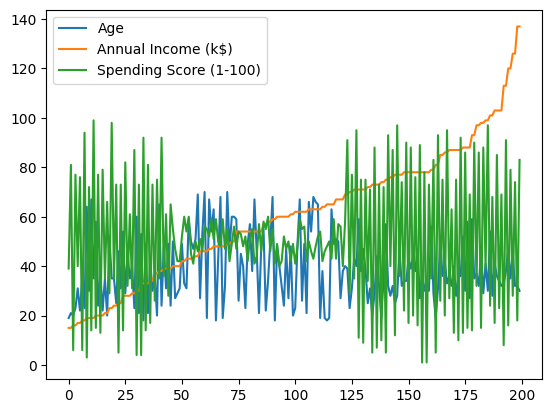

In [72]:
#Before Scaling
plt.plot(data)
plt.legend(data.columns)

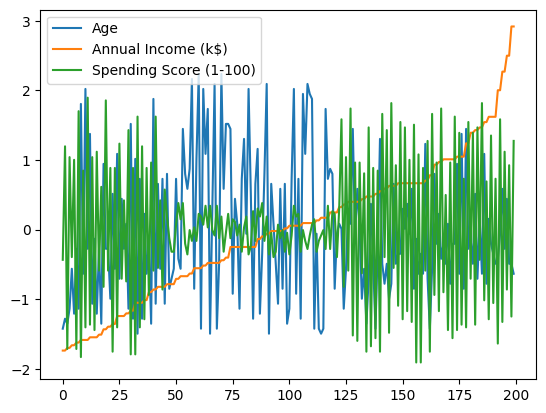

In [73]:
# After Scaling
plt.plot(data_scaled)
plt.legend(data.columns)

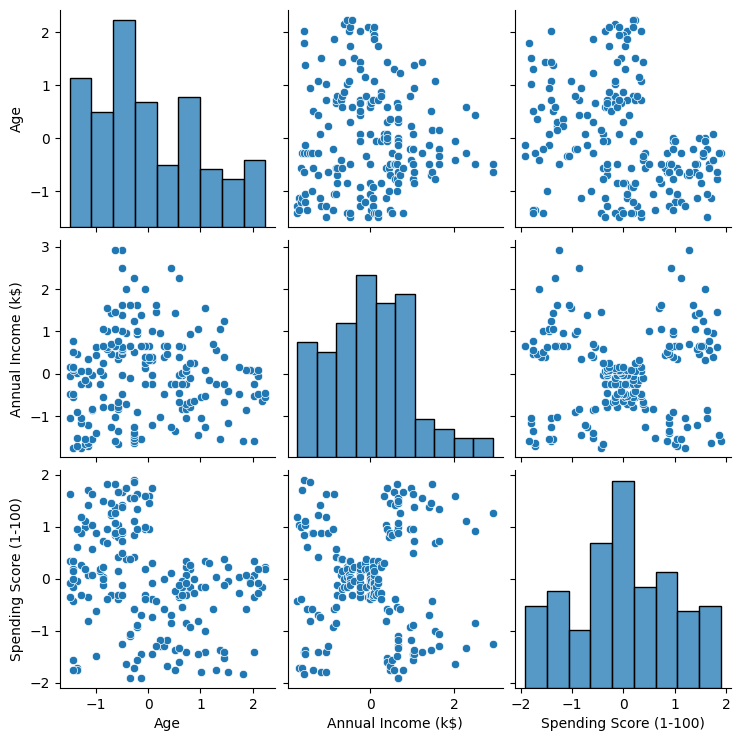

In [74]:
sns.pairplot(data_scaled)

In [75]:
data_scaled.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot: >

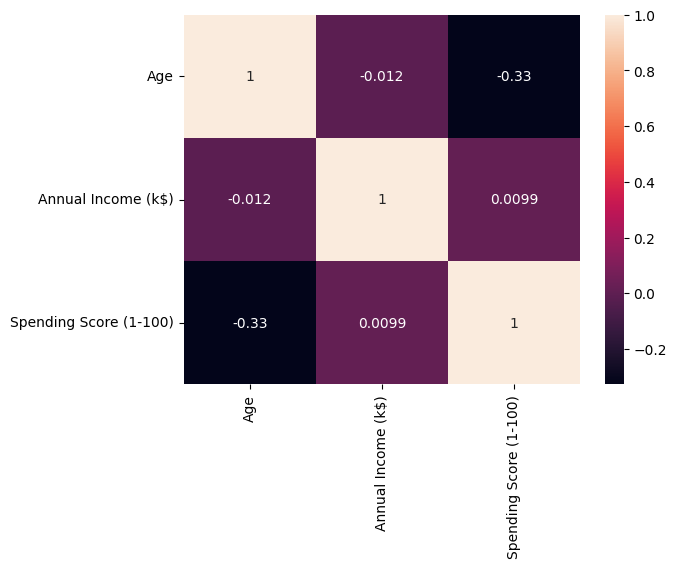

In [76]:
sns.heatmap(data_scaled.corr(),annot=True)

# Hierarchical Clustering

In [77]:
from scipy.cluster.hierarchy import dendrogram, linkage

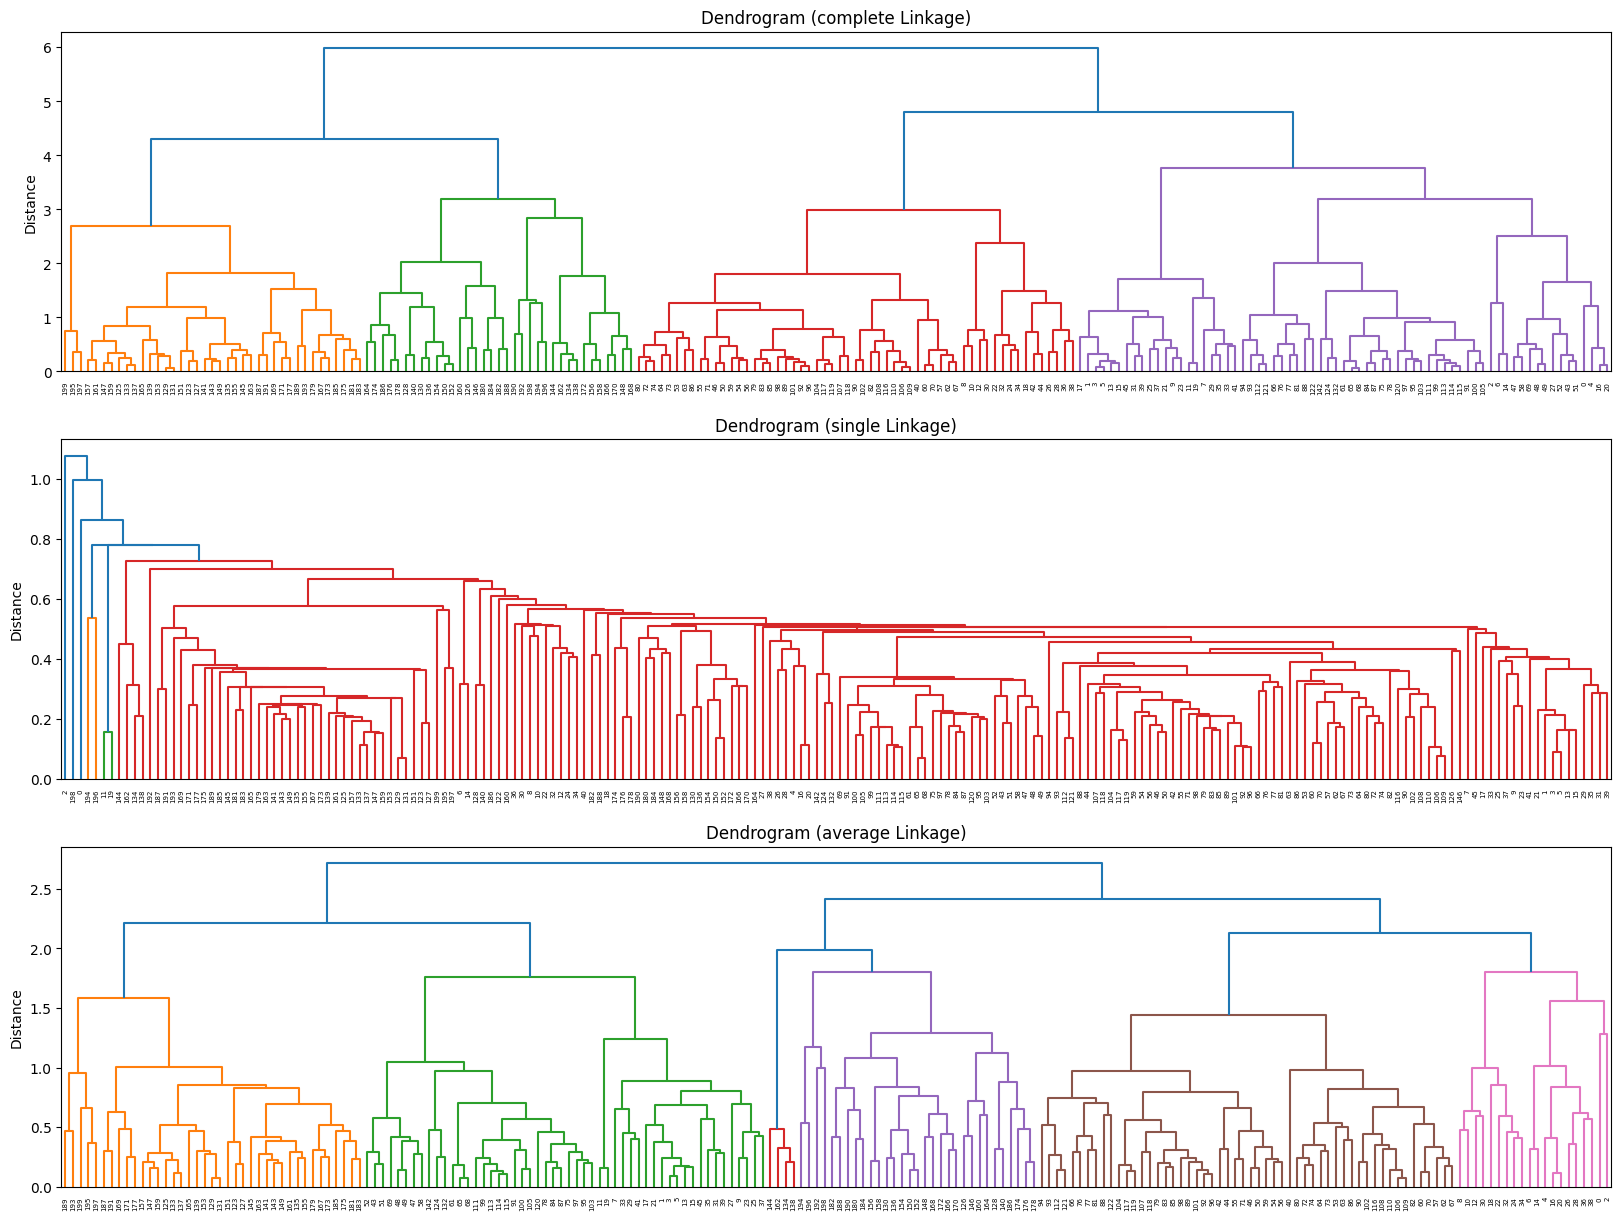

In [78]:
methods ={"single",'average','complete'}
fig,axs=plt.subplots(len(methods),1,figsize=(20,15))

for i, method in enumerate(methods):
    
    z = linkage(data_scaled, metric = 'euclidean', method=method )
    dendrogram(z,ax=axs[i])
    
    axs[i].set_title(f'Dendrogram ({method} Linkage)')
    axs[i].set_ylabel('Distance')
    

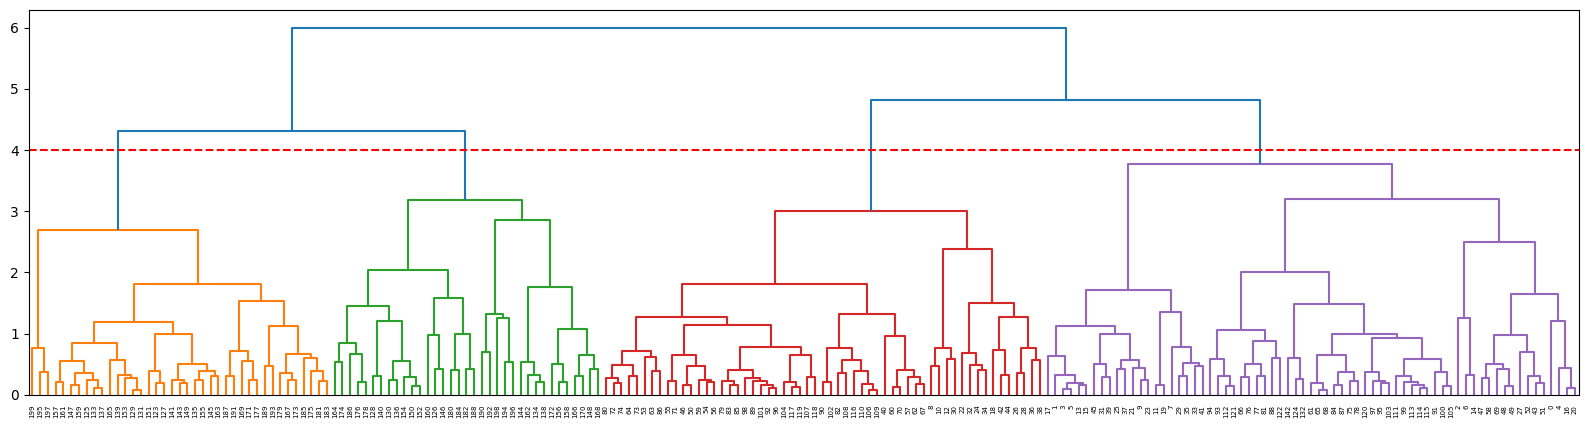

In [79]:
plt.figure(figsize=(20,5))
dend = dendrogram(linkage(data_scaled, method='complete'))
plt.axhline(y=4, color='r', linestyle='--')

In [80]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
hierarchical.fit(data_scaled)

In [82]:
data_scaled_copy = data_scaled.copy(deep=True)
data_scaled_copy.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [83]:
data['HCLabels']= hierarchical.labels_

In [29]:
data['HCLabels'].value_counts()

0    69
2    57
3    39
1    35
Name: HCLabels, dtype: int64

In [30]:
data[data['HCLabels']==0]

,Age,Annual Income (k$),Spending Score (1-100),HCLabels
0,19,15,39,0
1,21,15,81,0
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
121,38,67,40,0
122,40,69,58,0
124,23,70,29,0
132,25,72,34,0


In [31]:
original_features = data_scaled.columns

mean = data.groupby('HCLabels').mean()

median = data.groupby('HCLabels').median()

df_hierachical = pd.concat([mean, median], axis = 0)

df_hierachical.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean','group_3 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median','group_3 Median',]

df_hierachical[original_features]

,Age,Annual Income (k$),Spending Score (1-100)
group_0 Mean,27.275362,42.782609,56.376812
group_1 Mean,41.685714,88.228571,17.285714
group_2 Mean,55.333333,47.315789,41.087719
group_3 Mean,32.692308,86.538462,82.128205
group_0 Median,26.000000,43.000000,54.000000
group_1 Median,43.000000,85.000000,16.000000
group_2 Median,53.000000,48.000000,46.000000
group_3 Median,32.000000,79.000000,83.000000


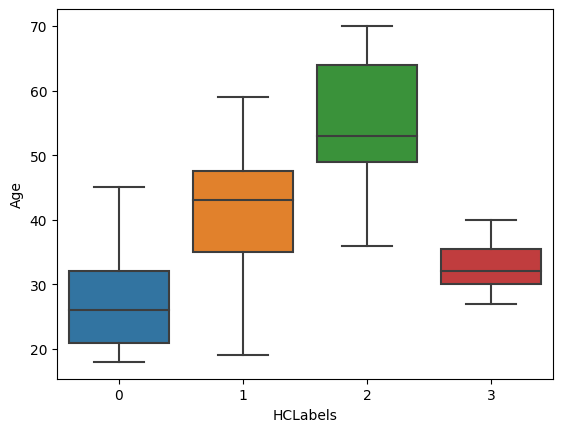

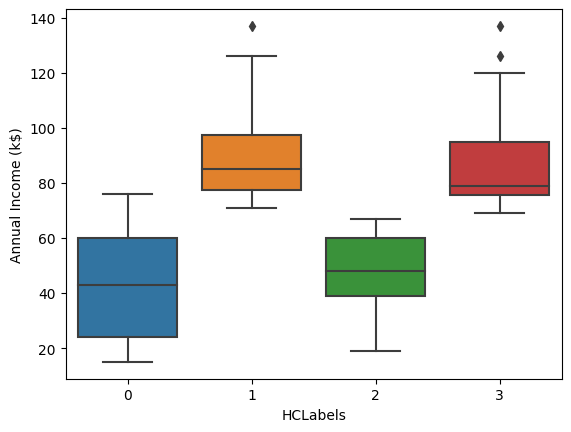

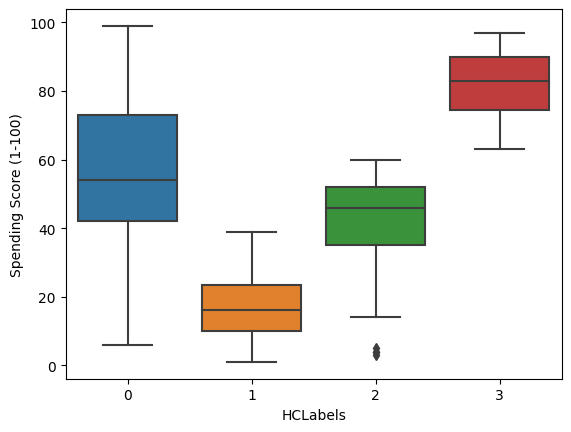

In [32]:
for col in data_scaled.columns:
    sns.boxplot(x = 'HCLabels', y = col, data = data)
    plt.show()

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

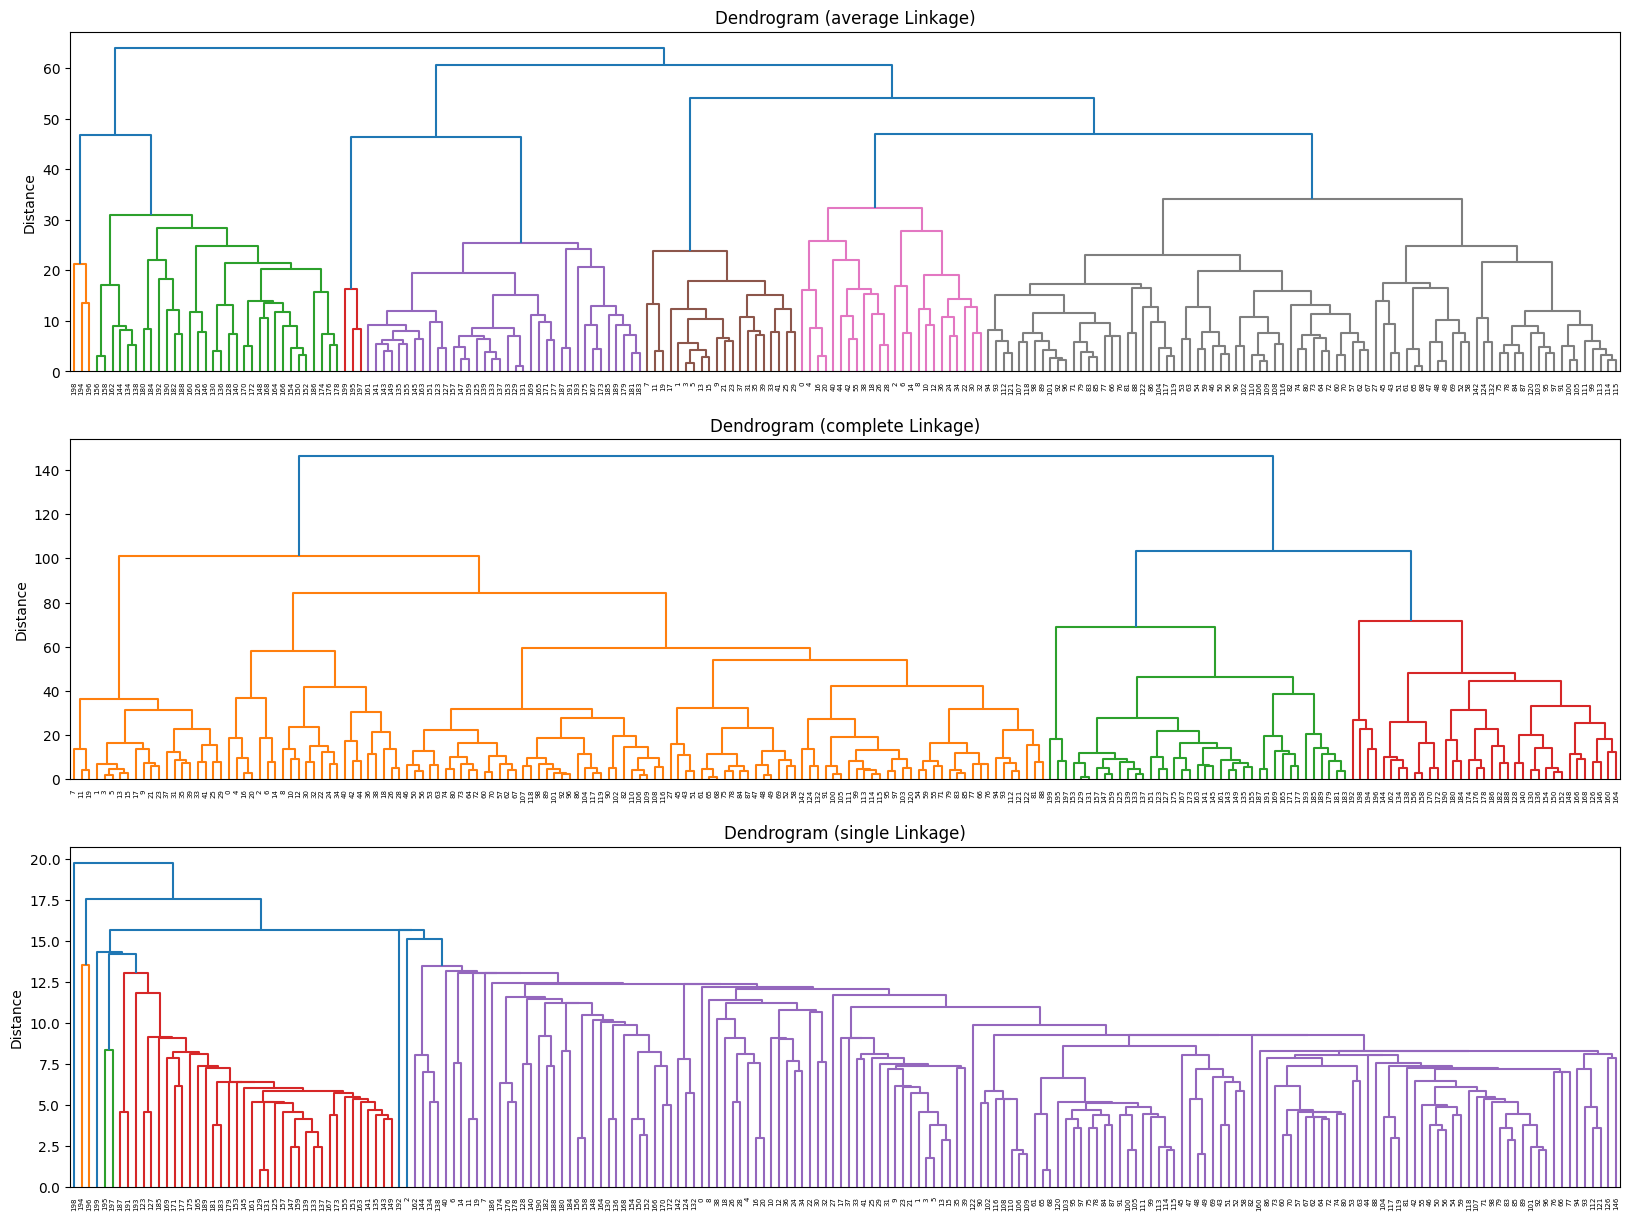

In [11]:
methods ={"single",'average','complete'}
fig,axs=plt.subplots(len(methods),1,figsize=(20,15))

for i, method in enumerate(methods):
    
    z = linkage(data, metric = 'euclidean', method=method )
    dendrogram(z,ax=axs[i])
    
    axs[i].set_title(f'Dendrogram ({method} Linkage)')
    axs[i].set_ylabel('Distance')
    

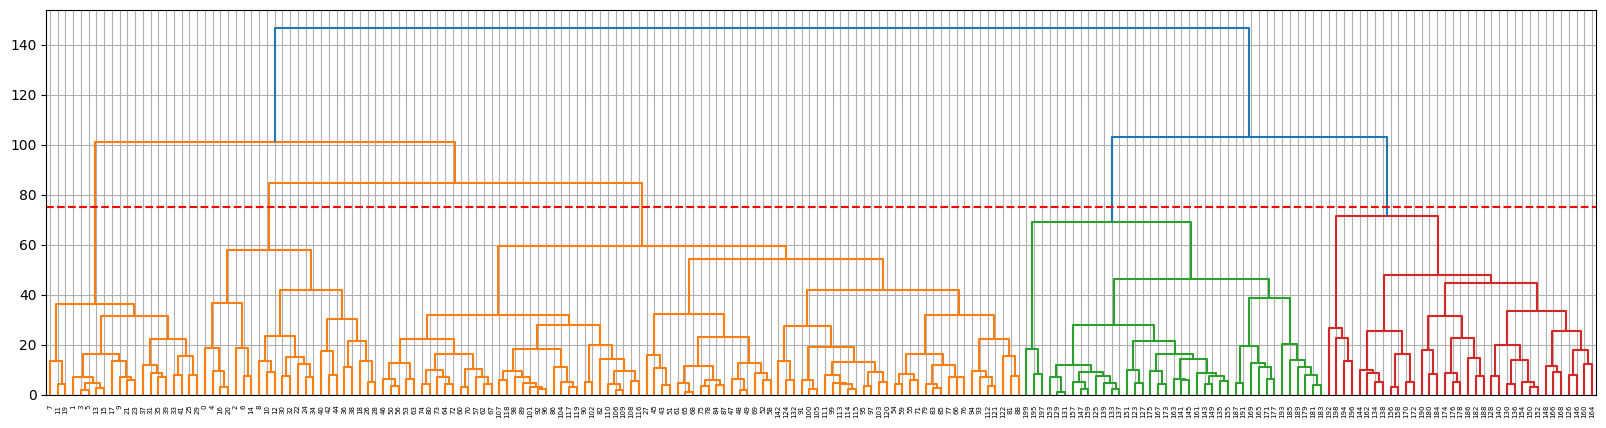

In [17]:
plt.figure(figsize=(20,5))
dend = dendrogram(linkage(data, method='complete'))
plt.axhline(y=75, color='r', linestyle='--')
plt.grid()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
hierarchical.fit(data_scaled)